we are going to perform linear regression

In [ ]:
#importing prerequisite libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

Uploading our dataset from a local directory

In [23]:
df = pd.read_csv(r'../tochora/insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
#shape of our dataset
df.shape

(1338, 8)

this dataset has 1338 rows and 8 columns

checking null values

In [25]:
#null values
df.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This dataset is clean as it does not contain any null values

In [26]:
# statistics
df.describe().style.background_gradient(cmap='viridis')

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


In [27]:
df.columns

Index(['index', 'age', 'sex', 'bmi', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

Data visualisation

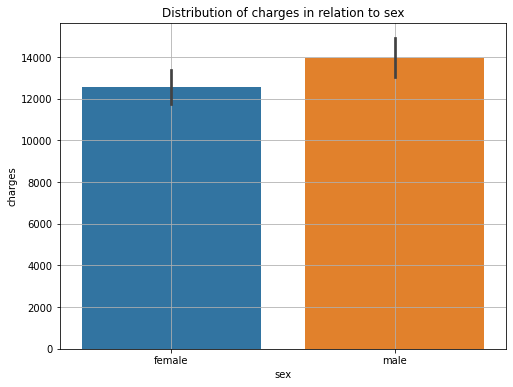

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['sex'], y=df['charges'])
plt.title("Distribution of charges in relation to sex")
plt.grid(True)

Males have a higher bar compared to females

conslusion: This shows that males have high charges of $ 14000 compared to females approximately $ 12500. This means that  males have a higher chance of commiting the insured risk compared to females.

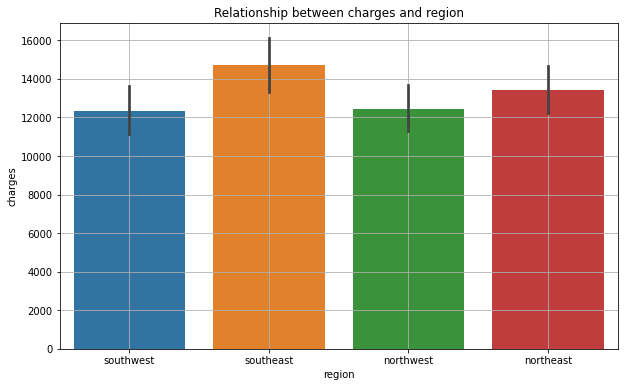

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['region'], y=df['charges'])
plt.title("Relationship between charges and region")
plt.grid(True)

Southeast region had the highest bar, follwed by northeast and southwest and northwest have approximately bars of the same size.

conclusion: residents in southwest region pays the highest charges 0f  approximately $ 14200 and Northeast  approximately $ 13800 which shows that either these regions have the highest number insured people or that there are higher chances of commiting insured risks thus the higher charges. 

Residents of Southwest and Northwest pays the lowest charges of approximately $ 12200 which shows that either they have the same but few number of insured people or the regions are considered less risky by the insurer.

In [30]:
import plotly.express as px
dfu = df.groupby('region')['bmi'].sum().reset_index().sort_values(by='bmi', ascending=False)
px.bar(dfu, dfu['region'], dfu['bmi'])


Southeast have the highest bar, followed  by southwest while northwest and northeast have the same sized bars

conclusion: Southeast has the highest cumulative bmi of 12k followed by southwest region with 10k. Regions northwest and northeast have the same albeit the lowest cumulative bmi of approximately 9k.

Text(0.5, 1.0, 'Insurance charges in relation to age')

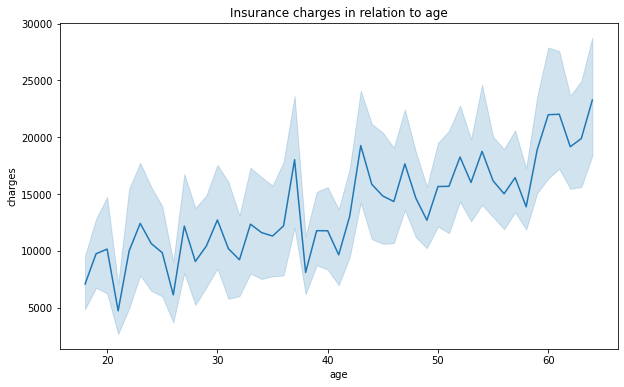

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['age'], y=df['charges'])
plt.title('Insurance charges in relation to age')

This lineplot rises steadily from age 20  falls sharply at age 38 but again rises to age 60 and above 

conclusion: Residents that are aged 20 years have the lowest charges since they are youthful and their bodies are quite resistant to ailments while those aged more than 40 years are considered high risk as they are prone to get sick thus the higher charges

Correlation

correlation refers to linear relationship between two variables where one variable might be directly on indirectly related to one another at either equal or uneaqual proportion. Correlation can either be negative or positive correlated depending on the sighn of the index. Negative sign = negative correlation and positive sighn = positive correlation.

correlation index of 0 to 0.25 is considered weak correlation, 2.5 to 7.5 is considered fairly correlated while 7.5 to 1 shows that the values are highly correlated


Text(0.5, 1.0, 'correlation between various features')

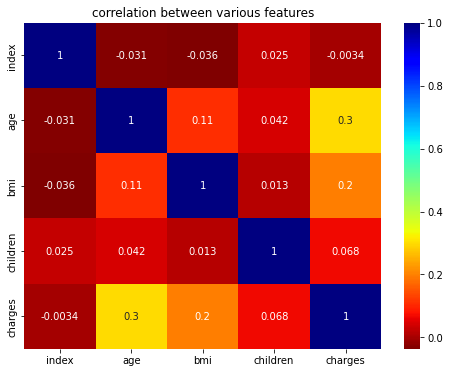

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='jet_r')
plt.title("correlation between various features")

Age and Charges are correlated 30% , bmi are correlated to charges by 20%. The rest have almost zero correlation.

Although small there is a fairly posive correlation between age and charges while there is low positive correlation between bmi and charges.The rest have very inconsequential correlations.

Outliear analysis

Text(0.5, 1.0, 'Detecting outliers in charges')

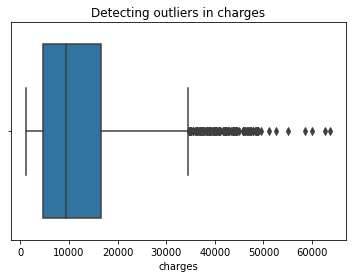

In [33]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['charges'])
plt.title("Detecting outliers in charges")

The above boxplot shows there are many outliers in the charges column. we will replace values greater than the 95% percentile with 75% percentile value in order to remove outliers.

In [34]:
# a function to remove outliers
def replace_outliers(df, x):
    q1 = np.percentile(df[x], 25)
    q3 = np.percentile(df[x], 75)
    q4 = np.percentile(df[x], 95)

    iqr = q3 - q1
    cut_off = iqr *0.25
    lower, upper =1, (q3 + cut_off)
    df[x] =np.where(df[x] >= q4, q3, df[x])
    df = df[(df[x] > lower) & (df[x] < upper)]
    print(f'the outliers of {x} have been removed')
    return df

the outliers of charges have been removed


Text(0.5, 1.0, 'Outlier detection in charges')

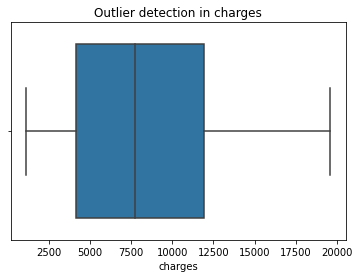

In [35]:
#applying our function to charges columns
df = replace_outliers(df, 'charges')
sns.boxplot(x= df['charges'])
plt.title("Outlier detection in charges")

The above boxplot shows our charges column is free of outliers. 

Text(0.5, 1.0, 'Detecting outliers in charges')

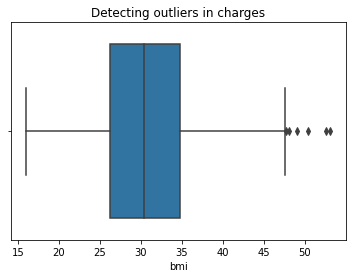

In [36]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bmi'])
plt.title("Detecting outliers in charges")

the figure above shoes that bmi column has few outliers and there is no need to remove them to avoid overfitting

In [37]:
# converting our dataset from a csv into a dataframe
df = pd.DataFrame(df)

In [38]:
#mean = df.bmi.mean()
#print(mean)
#ist = []
#ist_ = []
#for s in df.bmi:
    #if(s < mean):
       # ist.append('Normal')
        #ist_.append(0)
    #else:
        #if(s > mean):
            #ist.append("High")
            #ist_.append(1)
#df['bmi_rank'] = ist 
#df.head()

        

dropping unnecessary columns

In [39]:
df.drop(columns=['index'], axis=1, inplace=True)

below we are going to assighn variables that are categorical in nature intergers in order to make them dummy variables so that we can fit them in our model

In [40]:
df['smoker'] = pd.Categorical(df['smoker']).codes
df['sex'] = pd.Categorical(df['sex']).codes
df['region'] = pd.Categorical(df['region']).codes
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620
4,32,1,28.88,0,0,1,3866.8552
5,31,0,25.74,0,0,2,3756.6216


In [41]:
#df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
#df['region'] = df['region'].apply({'southeast':1, 'southwest':2, 'northeast':3, 'northwest':4}.get)
#df['smoker'] = df['smoker'].apply({'yes':0, 'no':1}.get)
#df.head()

we are going to split our dataset into x and y variables 

In [43]:
# splitting our dataset
x = df.drop(['charges'], axis=1)
y = df.charges

In [44]:
#futher splitting our dataset into train and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=40)

In [45]:
# preprocessing values in our variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
#modelling 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
score = lr.score(x_test, y_test)
print(score)
pred = lr.predict(x_test)

0.8006622242306634


our model has an accuracy of 80%. it is quite impressive

Now, we are going to use our model to make predictions.The dataframe below shows predicted values, actual values and also the difference between predicted and actual values

In [47]:
#making predictions
diff = y_test - pred
dff = pd.DataFrame({"actual":y_test, 'predictions': pred, 'Difference': diff})
print(dff.head(8))

          actual   predictions   Difference
787    1917.3184   2776.273456  -858.955056
728    2217.6012   2903.436295  -685.835095
1274  17043.3414  13061.347874  3981.993526
1140   9048.0273   9156.458479  -108.431179
1135  11085.5868  11039.037233    46.549567
108    2867.1196   4376.977186 -1509.857586
345    6184.2994   7369.430438 -1185.131038
875    2690.1138   3918.179348 -1228.065548


below is an implementation of ols linear regression. we are just using it for referencing

In [48]:
import statsmodels.api as sm 
x = sm.add_constant(x)
lm_8 = sm.OLS(y, x).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     611.1
Date:                Mon, 06 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:43:36   Log-Likelihood:                -10360.
No. Observations:                1126   AIC:                         2.073e+04
Df Residuals:                    1119   BIC:                         2.077e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -618.6308    396.114     -1.562      0.1